<a href="https://colab.research.google.com/github/weso500/1B-Shared/blob/main/AE_FDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install pyreadr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.7/411.7 kB 6.4 MB/s eta 0:00:00


In [4]:
import pyreadr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install scikit-fda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 112.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.6 MB/s eta 0:00:00


In [5]:
df_FaultFree = pyreadr.read_r(r'/content/drive/MyDrive/FDA Journal/TEP_FaultFree_Training.RData')['fault_free_training']
df_Faulty = pyreadr.read_r(r'/content/drive/MyDrive/FDA Journal/TEP_Faulty_Training.RData')['faulty_training']
test_Faultfree = pyreadr.read_r(r'/content/drive/MyDrive/FDA Journal/TEP_FaultFree_Testing.RData')['fault_free_testing']
test_Faulty = pyreadr.read_r(r'/content/drive/MyDrive/FDA Journal/TEP_Faulty_Testing.RData')['faulty_testing']

In [6]:
DF = pd.concat([df_FaultFree,df_Faulty]) # Join both fault free and faulty dataset
DF.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
fault_free = DF[DF['faultNumber']==0].iloc[:,3:]

In [8]:
# prompt: Ok now I want to grab all the ones with fault numbers other than 0,3,9 and I want the sample number to be over 20

# Fault numbers to exclude
excluded_faults = [0, 3, 9]

# Filter the DataFrame
filtered_df = DF[
    (~DF['faultNumber'].isin(excluded_faults)) &  # Fault numbers not in the excluded list
    (DF['sample'] > 20)                           # Sample number over 20
]

# Display the first few rows of the filtered DataFrame
print(filtered_df.head())

# Display the shape of the filtered DataFrame
print("Shape of filtered DataFrame:", filtered_df.shape)

    faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  xmeas_4  \
20          1.0            1.0      21  0.27833   3649.7   4479.9   9.3498   
21          1.0            1.0      22  0.27992   3647.2   4516.1   9.4246   
22          1.0            1.0      23  0.24735   3648.7   4505.7   9.4650   
23          1.0            1.0      24  0.24847   3677.2   4491.0   9.3595   
24          1.0            1.0      25  0.23415   3732.0   4481.1   9.3340   

    xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4   xmv_5   xmv_6  \
20   26.379   42.488   2702.4  ...  53.947  27.761  60.598  21.544  39.421   
21   27.084   42.347   2705.2  ...  53.514  27.605  61.221  21.695  39.283   
22   26.751   42.653   2707.2  ...  53.982  24.505  61.250  21.459  42.217   
23   26.869   42.423   2709.9  ...  54.157  24.396  61.622  20.911  42.192   
24   26.891   41.973   2713.5  ...  53.801  23.195  59.489  20.898  39.767   

     xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
20  38.569  46.94

In [9]:
faulty = filtered_df.iloc[:,3:]

In [11]:
# prompt: Ok now drop all but 5000 samples at random from faulty

# Drop samples randomly from faulty to keep only 5000
if len(faulty) > 5000:
  faulty = faulty.sample(n=5000, random_state=42) # Use a random state for reproducibility

print("Shape of faulty DataFrame after dropping samples:", faulty.shape)

Shape of faulty DataFrame after dropping samples: (5000, 52)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, _, _ = train_test_split(fault_free, fault_free, test_size=0.2, random_state=42)

In [13]:
# prompt: Now merge faulty with X_test. Put the faulty set at the end

import pandas as pd
X_test_merged = pd.concat([X_test, faulty])

In [14]:
X_train = sc.fit_transform(fault_free)
X_test_merged = sc.transform(X_test_merged)

In [17]:
from skfda.representation.basis import BSpline
from skfda.representation import FDataGrid, FDataBasis

basis = BSpline(n_basis=15, order = 3)
X_train_FDA = FDataBasis.from_data(X_train, grid_points= np.linspace(0, 1, 52), basis=basis)
X_test_FDA = FDataBasis.from_data(X_test_merged, grid_points= np.linspace(0, 1, 52), basis=basis)

X_train_FDA = X_train_FDA.coefficients
X_test_FDA = X_test_FDA.coefficients

In [24]:
print(X_train_FDA.shape)
print(X_test_FDA.shape)

(250000, 15)
(55000, 15)


In [25]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Define input layer
input_layer = Input(shape=(X_train_FDA.shape[1],))

# Define encoder layers
encoded = Dense(32, activation='relu')(input_layer)

# Define decoder layers
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(X_train_FDA.shape[1], activation='linear')(decoded)

# Define autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

# Print model summary
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │           495 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,063 (8.06 KB)

 Trainable params: 2,063 (8.06 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8338 - val_loss: 0.5920
Epoch 2/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5283 - val_loss: 0.3828
Epoch 3/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3514 - val_loss: 0.2568
Epoch 4/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2355 - val_loss: 0.1781
Epoch 5/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1674 - val_loss: 0.1362
Epoch 6/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1297 - val_loss: 0.1093
Epoch 7/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1035 - val_loss: 0.0913
Epoch 8/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0880 - val_loss: 0.0776
Epoch 9/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0741 - val_loss: 0.0664
Epoch 10/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0636 - val_loss: 0.0573
Epoch 11/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0555 - val_loss: 0.0496
Epoch 12/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

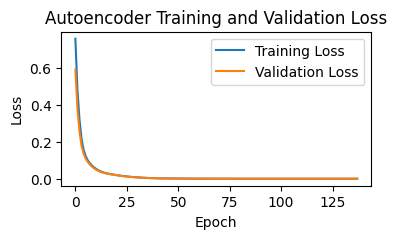

In [27]:
# Define early stopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# Fit autoencoder model with early stopping callback
history = autoencoder.fit(X_train_FDA[::50], X_train_FDA[::50],
                epochs=300,
                batch_size=128,
                shuffle=True,
                validation_data=(X_train_FDA[::50], X_train_FDA[::50]),
                callbacks=[early_stopping_callback])

plt.rcParams['figure.figsize'] = [4, 2]
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
def recon_loss(NN,X):
    #NN is the trained neural network model
    X_pred = NN.predict(X)
    reconstruction_loss = np.mean((X-X_pred)**2,axis=1)
    return reconstruction_loss

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step


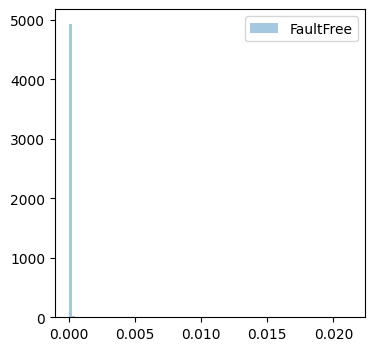

In [30]:
FaultFree_reconstruction_loss=recon_loss(NN=autoencoder,X=X_train_FDA[np.random.randint(1,len(X_train_FDA),5000)])

plt.rcParams['figure.figsize'] = [4, 4]
plt.hist(FaultFree_reconstruction_loss, bins=100,label='FaultFree',alpha=0.4)
plt.legend()
plt.show()

In [31]:
# Obtain mean and standard deviation for
mu = np.mean(FaultFree_reconstruction_loss)
std = np.std(FaultFree_reconstruction_loss)

# Obtain threshold from mu and std
threshold = mu+3*std
threshold

np.float64(0.001829565547662697)

In [40]:
print(X_test_FDA.shape)

(55000, 15)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step


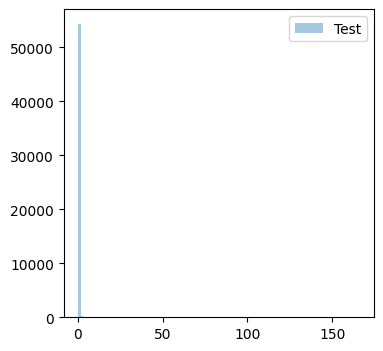

In [41]:
Test_reconstruction_loss=recon_loss(NN=autoencoder,X=X_test_FDA)

plt.rcParams['figure.figsize'] = [4, 4]
plt.hist(Test_reconstruction_loss, bins=100,label='Test',alpha=0.4)
plt.legend()
plt.show()

In [42]:
print(Test_reconstruction_loss.shape)

(55000,)


In [43]:
# prompt: Ok generate a list where the first 50000 entries are zero and the last 5000 are 1s

import numpy as np
# Generate the list with 50000 zeros and 5000 ones
y_test_merged = [0] * 50000 + [1] * 5000

# Convert the list to a numpy array if needed for further processing
y_test_merged = np.array(y_test_merged)

print(f"Length of y_test_merged: {len(y_test_merged)}")
print(f"Number of zeros: {np.sum(y_test_merged == 0)}")
print(f"Number of ones: {np.sum(y_test_merged == 1)}")

Length of y_test_merged: 55000
Number of zeros: 50000
Number of ones: 5000


In [46]:
# prompt: Ok now cycle through everything in Test_reconstruction_loss, if the value is greater than threshold, enter a 1 if less than threshold enter a zero

anomalies_predicted = []

for i in range(len(Test_reconstruction_loss)):
  if Test_reconstruction_loss[i] > threshold:
    anomalies_predicted.append(1)
  else:
    anomalies_predicted.append(0)

print(anomalies_predicted[:55000]) # Print first 100 predictions to check
print(f"Length of anomalies_predicted: {len(anomalies_predicted)}")
print(f"Number of predicted anomalies (1s): {anomalies_predicted.count(1)}")
print(f"Number of predicted non-anomalies (0s): {anomalies_predicted.count(0)}")

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [47]:
from sklearn.metrics import f1_score,accuracy_score
f1 = f1_score(y_test_merged, anomalies_predicted, average='macro')
acc = accuracy_score(y_test_merged, anomalies_predicted,)
print(f"F1 Score: {f1}")
print(f"Accuracy Score: {acc}")

F1 Score: 0.8195238758421766
Accuracy Score: 0.952490909090909
